In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.special import expi, betainc, beta, erf
from scipy.optimize import curve_fit
from numba import njit, jit
font = {'size': 25, 'weight':'normal'}
plt.rc('font', **font)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
rng = np.random.default_rng(seed=42)
colors=[['blue',"slateblue"], ['darkgoldenrod', "goldenrod"], ['red', "indianred",], ['olivedrab', "yellowgreen"], ['black','dimgray'], ['plum',"pink"],['orangered','coral'] ]

from numba import jit
from collections import defaultdict
from numba.typed import Dict,List
from numba import types

In [4]:
Nvisits = 100000
Nsamples = 100

lisdir=List([(0,0),(0,1),(1,0)])

@jit(nopython=True)
def move(pt,lisdir):
    if pt==(0,0):
      return lisdir[np.random.randint(1,3)]
    else:
      list_pos=[]
      for d in lisdir:
        c=(pt[0]-d[0],pt[1]-d[1])
        c=c[0] & c[1]
        if c==0:
           list_pos.append((-d[0],-d[1]))
      c=list_pos[np.random.randint(len(list_pos))]
      lisdir2=lisdir[:]
      while (-c[0],-c[1]) in lisdir2:
            lisdir2.remove((-c[0],-c[1]))
      c2=lisdir2[np.random.randint(len(lisdir2))]
      return (pt[0]+c[0]+c2[0],pt[1]+c[1]+c2[1])


# Scaling of the flip probability $\pi_n \propto 1/n$

In [5]:
@jit(nopython=True)
def flip_list_sample_origin(lisdir):
    # here a flip happens when the RW goes from incrementing the span to the origin of the walk
    # returns an array flip_array of size Nvisits / sample_flip_gap 
    # flip[k] is 1 if there has been a flip at the sample_flip_gap * k visit, 0 else
    food_eaten = 1
    c0 = (0,0) 
    c=c0
    pos={}
    pos[c]=True

    last_color_eaten = 1 # -1 = origin, 1 = boundary (positive >0 abscissa); we start with 1 since the origin is a new site at first
    flip_array = np.zeros(Nvisits) # flip_array[k] is 0 if no flip at the kth visit, 1 else
    
    while food_eaten < Nvisits:
        c=move(c,lisdir)
        is_c_0 = (c==(0,0))
        
        # both methods are the same below.
        
        # only consider the event if either the walker is at the boundary, or if it transitions from the boundary to the origin
        # if (c not in pos) or (is_c_0 and (last_color_eaten==1)):
        #     color = 2*(1- is_c_0) - 1 # -1 at origin, 1 else
        #     flip = (color * last_color_eaten)<0
        #     # print(c,color)
        #     last_color_eaten = color
        #     flip_array[food_eaten] = flip
        #     if not (is_c_0):
        #         pos.add(c)
        #         # adding one unit of food at the origin or not doing it CHANGES the scalings
        #         # the correct choice is to increment food ONLY after visiting a new site, NOT when visiting the origin.
        #         food_eaten += 1

        if last_color_eaten==1 and is_c_0:
            flip_array[food_eaten]=1
            last_color_eaten=-1

        if c not in pos:
            pos[c]=True
            # flip_array[food_eaten]=int(last_color_eaten==-1)
            food_eaten+=1
            last_color_eaten=1
                  
    return flip_array

In [ ]:
f = []
for s in range(Nsamples):
    f.append(flip_list_sample_origin(lisdir))
    print(s)
    # print(f[-1].size)
    # print(np.sum(np.array(f)))

0
1
2
3


In [5]:
f_mean = np.mean(f, axis=0)
mean_F = np.cumsum(f_mean)
np.save("./mean_F_sierpinski.npy",mean_F)

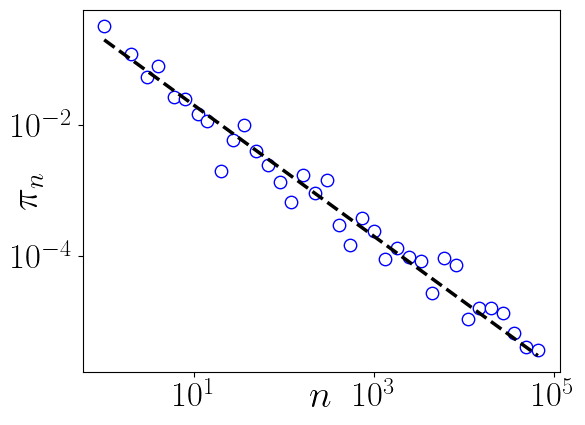

In [4]:
mean_F = np.load("./mean_F_sierpinski.npy")
Nvisits=mean_F.size
base=1.35
t_logscale = np.array([int(base**i) for i in range(0,int(np.emath.logn(base,Nvisits)))])
pi_coarsegrained = np.array([(mean_F[int(base**(i+1))]-mean_F[int(base**i)])/(int(base**(i))) for i in range(0,int(np.emath.logn(base,Nvisits)))])
fig, ax = plt.subplots(1, 1)
plt.scatter(
    t_logscale,
    pi_coarsegrained,
    color='blue',           # Edge color
    s=80,                    # Marker size (7^2)
    facecolors='white',      # Hollow markers
    linewidths=1             # Edge line width
)

plt.plot(t_logscale, .2/ (t_logscale),'--k',linewidth=2.5)
# plt.plot(t_logscale, 0.1/ (t_logscale),'--',color='red')
plt.semilogx()
plt.semilogy()

ax.set_ylabel(r'$\pi_n$', fontsize=28, labelpad=-25,loc='center')
ax.set_xlabel(r'$n$', fontsize=28, labelpad=-25,loc='center')
plt.tight_layout()
plt.savefig('./Figures/pin-sierpinski.pdf', dpi=600, bbox_inches='tight')
plt.show()

0.7766855282642462


C:\Users\julie\AppData\Local\Temp\ipykernel_18008\2265358062.py:13: RuntimeWarning: divide by zero encountered in log
  plt.plot(times,(1+mean_F) / np.log(times))
C:\Users\julie\AppData\Local\Temp\ipykernel_18008\2265358062.py:13: RuntimeWarning: divide by zero encountered in divide
  plt.plot(times,(1+mean_F) / np.log(times))
C:\Users\julie\AppData\Local\Temp\ipykernel_18008\2265358062.py:14: RuntimeWarning: divide by zero encountered in log
  plt.plot(times,(1) / np.log(times))
C:\Users\julie\AppData\Local\Temp\ipykernel_18008\2265358062.py:14: RuntimeWarning: divide by zero encountered in divide
  plt.plot(times,(1) / np.log(times))
C:\Users\julie\AppData\Local\Temp\ipykernel_18008\2265358062.py:15: RuntimeWarning: divide by zero encountered in log
  plt.plot(times,(1+mean_F) / np.log(np.log(times)))
C:\Users\julie\AppData\Local\Temp\ipykernel_18008\2265358062.py:15: RuntimeWarning: invalid value encountered in log
  plt.plot(times,(1+mean_F) / np.log(np.log(times)))
C:\Users\julie\

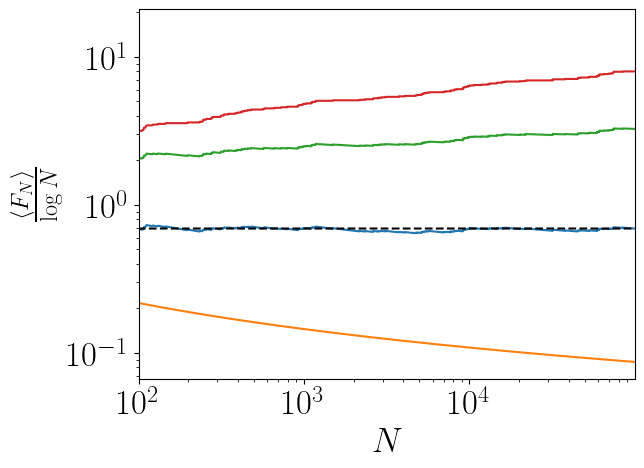

In [95]:
mean_F = np.mean(np.cumsum(f,axis=1),axis=0  )
times = np.arange(Nvisits)

fig, ax = plt.subplots(1,1)

def logfit(x,A):
    return np.log(x+1)**A

popt, _=curve_fit(logfit,times, mean_F)
A=popt[0]
print(A)

plt.plot(times,(1+mean_F) / np.log(times))
plt.plot(times,(1) / np.log(times))
plt.plot(times,(1+mean_F) / np.log(np.log(times)))
plt.plot(times,(1+mean_F))
plt.plot(times, np.ones(times.size)*((1+mean_F) / (np.log(times)))[-1],'--k')
# plt.plot(times,mean_F )
plt.xlim(100,times[-1])
ax.set_xlabel(r"$N$")
ax.set_ylabel(r"$\frac{\langle F_N \rangle}{\log N}$")
# ax.set_ylabel(r"$\langle F_N \rangle$")
# plt.legend()
plt.loglog()

# plt.xlim(-2.5,4)
# plt.savefig(f"Figures/mean-nb-flips-boundary-to-origin-sierpinski.pdf", dpi=600,bbox_inches='tight')
plt.show()

# SATW On sierpinski

In [2]:
import numpy as np
from numba import njit, types
from numba.typed import Dict

# Your existing pieces
Nvisits = 10000
Nsamples = 100
phi=2

# Triangular lattice directions (6-neighborhood)
DIRS6 = np.array([(1,0), (0,1), (-1,-1), (-1,0), (0,-1), (1,1)], dtype=np.int64)

@njit
def on_gasket(x, y):
    # stay in the nonnegative quadrant so the bitwise test matches the classic gasket
    return x >= 0 and y >= 0 and ((x & y) == 0)

@njit
def move_self_interacting(pt, seen_dict):
    """
    Self-interacting step:
      - unseen category chosen with prob 1/(1+phi)
      - seen category chosen with prob phi/(1+phi)
      - then uniform among neighbors in that category
    """
    # Gather valid neighbors on the gasket
    neigh = []
    for k in range(DIRS6.shape[0]):
        dx, dy = DIRS6[k]
        nx, ny = pt[0] + dx, pt[1] + dy
        if on_gasket(nx, ny):
            neigh.append((nx, ny))

    # Partition neighbors into seen / unseen
    seen_neigh = []
    unseen_neigh = []
    for (nx, ny) in neigh:
        if (nx, ny) in seen_dict:
            seen_neigh.append((nx, ny))
        else:
            unseen_neigh.append((nx, ny))

    # Decide category
    p_unseen = 1.0 / (1.0 + phi)
    r = np.random.random()

    pick_from_unseen = False
    if len(unseen_neigh) == 0 and len(seen_neigh) == 0:
        # no valid neighbor (degenerate); stay put
        return pt
    elif len(unseen_neigh) == 0:
        pick_from_unseen = False
    elif len(seen_neigh) == 0:
        pick_from_unseen = True
    else:
        pick_from_unseen = (r < p_unseen)

    # Uniform within chosen category
    if pick_from_unseen:
        idx = np.random.randint(len(unseen_neigh))
        nx, ny = unseen_neigh[idx]
    else:
        idx = np.random.randint(len(seen_neigh))
        nx, ny = seen_neigh[idx]

    return (nx, ny)

In [3]:
@njit
def flip_list_sample_origin():
    # here a flip happens when the RW goes from incrementing the span to the origin of the walk
    # returns an array flip_array of size Nvisits / sample_flip_gap 
    # flip[k] is 1 if there has been a flip at the sample_flip_gap * k visit, 0 else
    food_eaten = 1
    c0 = (0,0) 
    c=c0
    pos={}
    pos[c]=True

    last_color_eaten = 1 # -1 = origin, 1 = boundary (positive >0 abscissa); we start with 1 since the origin is a new site at first
    flip_array = np.zeros(Nvisits) # flip_array[k] is 0 if no flip at the kth visit, 1 else
    
    while food_eaten < Nvisits:
        # print(food_eaten)
        c=move_self_interacting(c,pos)
        is_c_0 = (c==(0,0))

        if last_color_eaten==1 and is_c_0:
            flip_array[food_eaten]=1
            last_color_eaten=-1

        if c not in pos:
            pos[c]=True
            # flip_array[food_eaten]=int(last_color_eaten==-1)
            food_eaten+=1
            last_color_eaten=1
                  
    return flip_array

In [4]:
f = []
for s in range(Nsamples):
    f.append(flip_list_sample_origin())
    print(s)
    # print(f[-1].size)
    # print(np.sum(np.array(f)))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [5]:
f_mean = np.mean(f, axis=0)
mean_F = np.cumsum(f_mean)
np.save(f"./mean_F_sierpinski_satw_phi{phi}.npy",mean_F)

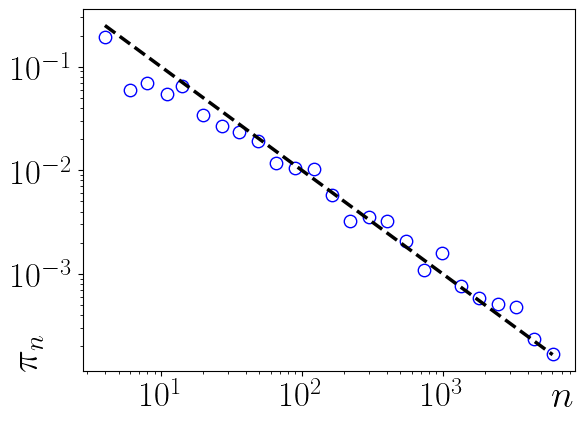

In [23]:
mean_F = np.load(f"./mean_F_sierpinski_satw_phi{phi}.npy")
Nvisits=mean_F.size
base=1.35
i_values = np.arange(5,int(np.emath.logn(base,Nvisits)))
t_logscale = np.array([int(base**i) for i in i_values])
pi_coarsegrained = np.array([(mean_F[int(base**(i+1))]-mean_F[int(base**i)])/(int(base**(i))) for i in i_values])
fig, ax = plt.subplots(1, 1)
plt.scatter(
    t_logscale,
    pi_coarsegrained,
    color='blue',           # Edge color
    s=80,                    # Marker size (7^2)
    facecolors='white',      # Hollow markers
    linewidths=1             # Edge line width
)

plt.plot(t_logscale, 1.0/ (t_logscale),'--k',linewidth=2.5)
# plt.plot(t_logscale, 0.1/ (t_logscale),'--',color='red')
plt.semilogx()
plt.semilogy()

ax.set_ylabel(r'$\pi_n$', fontsize=28, labelpad=-25,loc='bottom')
ax.set_xlabel(r'$n$', fontsize=28, labelpad=-25,loc='right')
plt.tight_layout()
plt.savefig(f'./Figures/pin-sierpinski-satw-phi{phi}.pdf', dpi=600, bbox_inches='tight')
plt.show()

# Distribution of $N_F$

In [ ]:
# We only consider 'true' excursions, that is, we do not allow for two adjacent values of N_F to be equal:
# we want that the walker has indeed eaten between returns to the origin.

@jit(nopython=True)
def simulate_NF(lisdir, F):
    # here a flip happens when the RW goes from incrementing the span to the origin of the walk
    # simulate until F flips occured
    c0 = (0,0) 
    c=c0
    pos=set()
    pos.add(c0)

    last_color_eaten = 1 # -1 = origin, 1 = boundary; but the origin counts as a new site at the start.
    flips = 0
    NF_array = [1] 
    current_NF = 1
    while flips < F:
        c=move(c,lisdir)
        is_c_0 = (c==(0,0))

        # only consider the event if either the walker is at the boundary, or if it transitions from the boundary to the origin
        if (not (c in pos)) or (is_c_0 and (last_color_eaten==1)):
            color = 2*(1- is_c_0) - 1 # -1 at origin, 1 else
            
            flip = (color * last_color_eaten)<0
            last_color_eaten = color
            
            if not (is_c_0):
                pos.add(c)
                # adding one unit of food at the origin or not doing it CHANGES the scalings
                # the correct choice is to increment food ONLY after visiting a new site, NOT when visiting the origin.
                current_NF += 1
            # has the walker really eaten during this excursion ? i.e. not a return 0 -> 0
            if flip and (NF_array[-1] != current_NF):
                NF_array.append(current_NF)
                flips+=1 
                   
    return np.array(NF_array)

In [ ]:
Nsamples = 400
F = 1
NF_array_samples = []
for s in range(Nsamples):
    print(s)
    NF_array_samples.append(simulate_NF(lisdir,F)[-1])

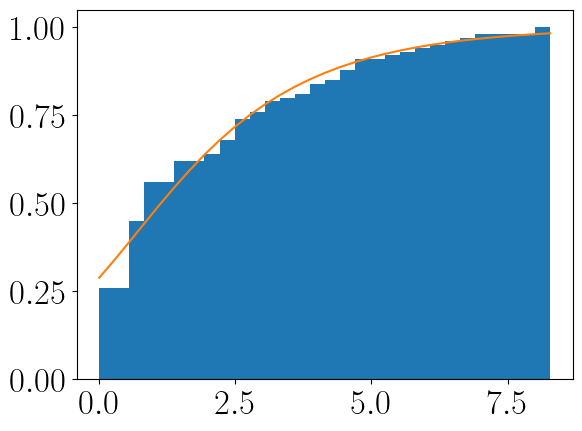

In [ ]:
phi = np.log(5/3)/np.log(2)/1.5
NF_array_samples = np.array(NF_array_samples)
x = plt.hist(np.log(NF_array_samples-1),cumulative=1,bins=30,density=1)[1]
plt.plot(x, (1-1/(1+np.exp(x))**phi))
plt.show()

In [ ]:
NF_array_samples

[2,
 4,
 42,
 5,
 2,
 15,
 2,
 8,
 41,
 2,
 2,
 5,
 2,
 2,
 2,
 4,
 2,
 414,
 6,
 52,
 15,
 2,
 14,
 3983,
 32,
 35,
 3,
 5,
 2,
 832,
 2,
 27,
 5,
 103,
 1090,
 143,
 2,
 9,
 819,
 2,
 3,
 1325,
 6,
 8,
 3,
 2,
 214,
 2,
 3,
 2,
 3,
 11,
 29,
 15,
 2,
 2,
 3,
 13,
 3,
 2,
 4,
 2,
 2,
 6949,
 2,
 13,
 25,
 6,
 364,
 329,
 1240,
 10,
 4,
 3,
 11,
 6636,
 2,
 761,
 3,
 7,
 15,
 15,
 32,
 5,
 14,
 3,
 5,
 23,
 4,
 4,
 2,
 21,
 635,
 13,
 192,
 15,
 2,
 3,
 5,
 3]

0.8687243753278792


C:\Users\julie\AppData\Local\Temp\ipykernel_18008\1728988537.py:13: RuntimeWarning: divide by zero encountered in log
  plt.plot(times,(2+mean_F) / np.log(times))
C:\Users\julie\AppData\Local\Temp\ipykernel_18008\1728988537.py:13: RuntimeWarning: divide by zero encountered in divide
  plt.plot(times,(2+mean_F) / np.log(times))
C:\Users\julie\AppData\Local\Temp\ipykernel_18008\1728988537.py:14: RuntimeWarning: divide by zero encountered in log
  plt.plot(times,(2+mean_F) / np.log(np.log(times)))
C:\Users\julie\AppData\Local\Temp\ipykernel_18008\1728988537.py:14: RuntimeWarning: invalid value encountered in log
  plt.plot(times,(2+mean_F) / np.log(np.log(times)))
C:\Users\julie\AppData\Local\Temp\ipykernel_18008\1728988537.py:16: RuntimeWarning: divide by zero encountered in log
  plt.plot(times, np.ones(times.size)*((2+mean_F) / (np.log(times)))[-1],'--k')
C:\Users\julie\AppData\Local\Temp\ipykernel_18008\1728988537.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(

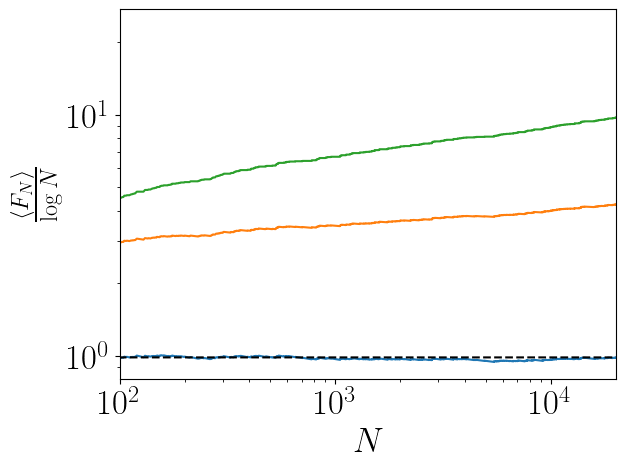

In [79]:
mean_F = np.mean(np.cumsum(f,axis=1),axis=0  )
times = np.arange(Nvisits)

fig, ax = plt.subplots(1,1)

def logfit(x,A):
    return np.log(x+1)**A

popt, _=curve_fit(logfit,times, mean_F)
A=popt[0]
print(A)

plt.plot(times,(2+mean_F) / np.log(times))
plt.plot(times,(2+mean_F) / np.log(np.log(times)))
plt.plot(times,(2+mean_F))
plt.plot(times, np.ones(times.size)*((2+mean_F) / (np.log(times)))[-1],'--k')
# plt.plot(times,mean_F )
plt.xlim(100,times[-1])
ax.set_xlabel(r"$N$")
ax.set_ylabel(r"$\frac{\langle F_N \rangle}{\log N}$")
# ax.set_ylabel(r"$\langle F_N \rangle$")
# plt.legend()
plt.loglog()

# plt.xlim(-2.5,4)
# plt.savefig(f"Figures/mean-nb-flips-boundary-to-origin-sierpinski.pdf", dpi=600,bbox_inches='tight')
plt.show()

0.833028995139493


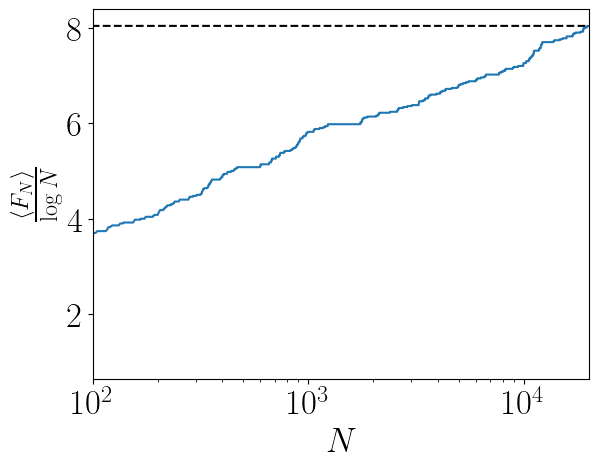

In [72]:
mean_F = np.mean(np.cumsum(f,axis=1),axis=0  )
times = np.arange(Nvisits)

fig, ax = plt.subplots(1,1)

def logfit(x,A):
    return np.log(x+1)**A

popt, _=curve_fit(logfit,times, mean_F)
A=popt[0]
print(A)

plt.plot(times,(1+mean_F))
plt.plot(times, np.ones(times.size)*((1+mean_F))[-1],'--k')
# plt.plot(times,mean_F )
plt.xlim(100,times[-1])
ax.set_xlabel(r"$N$")
ax.set_ylabel(r"$\frac{\langle F_N \rangle}{\log N}$")
# ax.set_ylabel(r"$\langle F_N \rangle$")
# plt.legend()
plt.semilogx()

# plt.xlim(-2.5,4)
# plt.savefig(f"Figures/mean-nb-flips-boundary-to-origin-sierpinski.pdf", dpi=600,bbox_inches='tight')
plt.show()